<a href="https://colab.research.google.com/github/BeautifulTovarisch/statistics-potpourri/blob/main/basic_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Plots

This Notebook demonstrates basic plotting with Julia using the PyPlot backend.

## Introduction

The following cells plot a simple polynomial and render a heatmap.

In [ ]:
import Pkg

Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("Measures")
Pkg.add("LaTeXStrings")

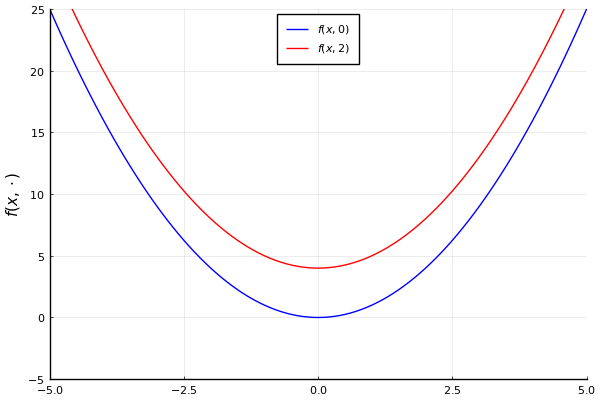

In [15]:
using Plots, LaTeXStrings, Measures; pyplot()

f(x,y) = x^2 + y^2
f0(x) = f(x, 0)
f2(x) = f(x, 2)

xVals, yVals = -5:0.1:5, -5:0.1:5
plot(xVals, [f0.(xVals), f2.(xVals)],
      c=[:blue :red], xlims=(-5,5), legend=:top,
      ylims=(-5,25), ylabel=L"f(x,\cdot)", label=[L"f(x,0)" L"f(x,2)"])

# p1 = annotate!(0, -0.2, text("(0,0) The minimum\n of f(x,0)", :left, :top, 10))
#
# z = [f(x,y) for y in yVals, x in xVals]
# p2 = surface(xVals, yVals, z, c=cgrad([:blue, :red]),legend=:none,
#       ylabel="y", zlabel=L"f(x,y)")
#
# M = z[1:10,1:10]
# p3 = heatmap(M, c=cgrad([:blue, :red]), yflip=true, ylabel="y",
# xticks=([1:10;], xVals), yticks=([1:10;], yVals))
#
# plot(p1, p2, p3, layout=(1,3), size=(1200,400), xlabel="x", margin=5mm)

## Hailstone Sequence

Suppose we want to generate a sequence of integers such that $x_{n+1} = f(x_n)$, where:

\begin{align}
f(x) =
\left\{
  \begin{array}{cl}
    x/2 & \text{if } x \mod 2 = 0 \\
    3x + 1 & \text{otherwise}
  \end{array}
  \right.
\end{align}

This sequence is known as the _hailstone_ sequence. The _Collatz conjecture_ posits that no matter how $x_0$ is chosen, the hailstone sequence converges at 1.

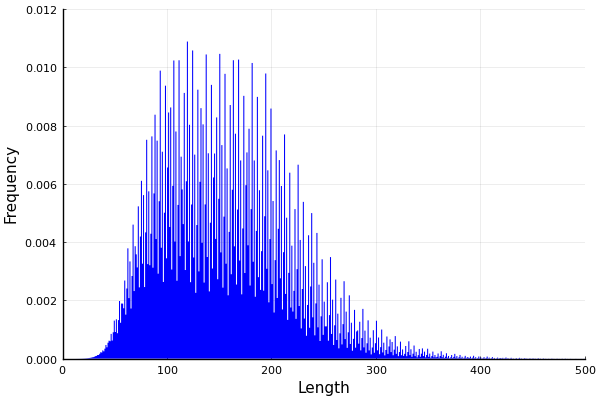

In [24]:
"""
Hailstone Sequence Histogram

The following plots the hailstone sequence given by the formula above.
"""

using Plots; pyplot()

"""
hailLength(x0) computes the number of elements in a hailstone sequence starting
at `x0`.

`x0` must be a positive Int.
"""
function hailLength(x0::Int)
  len = 0
  while x0 > 1
    x0 = (x0 % 2 == 1) ? 3x0 + 1 : Int(x0/2)

    len += 1
  end

  return len
end

lens = [hailLength(x0) for x0 in 2:10^7]

histogram(lens, bins=1000, normed=:true,
          fill=(:blue, true), la=0, legend=:none,
          xlims=(0, 500), ylims=(0, 0.012),
          xlabel="Length", ylabel="Frequency")